In [1]:
%pylab inline
from landlab import RasterModelGrid
from landlab.plot.imshow import imshow_grid_at_node
from landlab.components import PresFlowNetwork, MeltCreep
import numpy as np
from matplotlib import colors,  cm
import matplotlib.animation as animation
from landlab.components.conduit_networks.calcite import calcite_diss_palmer_transfer

from PIL import Image
from PIL import ImageDraw

def plot_links(grid, value_name, autoscale=True, 
               vmin=0., vmax=0., cmap_name='viridis', 
               magnitude= False, lw=5, 
               pixels_per_node=31, x_name='X', 
               y_name='Y', var_name='', use_PIL=True):#, logvalues=False ):
    if use_PIL:
        pixel_xscaling_factor = pixels_per_node/grid.dx
        pixel_yscaling_factor = pixels_per_node/grid.dy
        im = Image.new('RGBA', ( int(round(grid.number_of_cell_columns*pixels_per_node)), int(round(grid.number_of_cell_rows*pixels_per_node)) ), (255,255,255,255))
        draw = ImageDraw.Draw(im)

    link_head_x = grid.node_x[grid.node_at_link_head]
    link_head_y = grid.node_y[grid.node_at_link_head]
    link_tail_x = grid.node_x[grid.node_at_link_tail]
    link_tail_y = grid.node_y[grid.node_at_link_tail]       
    if magnitude:
        values = abs(grid.at_link[value_name])
    else:
        values = grid.at_link[value_name]
    #if logvalues:
    #    values = np.log10(abs(grid.at_link[value_name]))
    
    
    
    #Normalize color values
    if autoscale:
        cnorm = colors.Normalize()
        cnorm.autoscale(values)
    else:
        cnorm = colors.Normalize(vmin,vmax)
    scalarMap = cm.ScalarMappable(norm=cnorm, cmap = get_cmap(cmap_name))
    scalarMap.set_array(values)
    #set_cmap()
    if use_PIL:
        for i, value in enumerate(values):
            draw.line( ((link_head_x[i]*pixel_xscaling_factor,link_head_y[i]*pixel_yscaling_factor),(link_tail_x[i]*pixel_xscaling_factor,link_tail_y[i]*pixel_yscaling_factor)),fill=scalarMap.to_rgba(value,bytes=True),width=lw) 
        imshow(np.asarray(im), origin='lower', extent=(0,grid.number_of_cell_columns,0,grid.number_of_cell_rows))
    else:
        for i, value in enumerate(values):
            xs = [link_head_x[i],link_tail_x[i]]
            ys = [link_head_y[i],link_tail_y[i]]
            img = plot(xs,ys,lw=lw,color=scalarMap.to_rgba(value))    
    cb = colorbar(scalarMap)
    cb.ax.set_ylabel(var_name)
    xlabel(x_name)
    ylabel(y_name)


Populating the interactive namespace from numpy and matplotlib


### Test case 1 (parallel conduits, head gradient boundary)

In [6]:
mg = RasterModelGrid((5,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

#mg.at_node['junction__elevation'] = -0.01*mg.node_x + 4.

w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] = w

#mg.at_node['input__discharge'][12]=0.05

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
h[mg.nodes_at_left_edge] = 10.
h[mg.nodes_at_right_edge] = 0.


mg.set_closed_boundaries_at_grid_edges(False,True,False,True)
Q[mg.active_links] = 0.#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg)

for i in arange(300):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt=5.)
    


Number of links =  85
Number of nodes =  50
Number of active links =  43
Number of core nodes =  24
Time iteration: 0
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [  1.00000000e+00   1.00000000e-06   1.00000000e-06   1.00000000e-06
   1.00000000e-06   1.00000000e-06   1.00000000e-06   1.00000000e-06
   1.00000000e-06   1.00000000e-06   1.00000000e-06   1.00000000e-06
   1.00000000e-06   1.00000000e-06   1.00000000e-06   1.00000000e-06
   1.00000000e-06   1.00000000e+00   1.00000000e-06   1.00000000e-06
   1.00000000e-06   1.00000000e-06   1.00000000e-06   1.00000000e-06
   1.00000000e-06   1.00000000e-06   1.00000000e-06   1.00000000e-06
   1.00000000e-06   1.00000000e-06   1.00000000e-06   1.00000000e-06
   1.00000000e-06   1.00000000e-06   1.00000000e+00   1.00000000e-06
   1.00000000e-06   1.00000000e-06   1.00000000e-06   1.00000000

max change in h:  9.45244165217e-05
average dh= 0.176772527614   average abs(dQ)= 0.0445169975434
Time iteration: 9
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   4.30227239e-01   3.41495049e-02   1.38577362e-04
   1.00000000e-06   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   4.30227239e-01   3.41495049e-02   1.38577362e-04
   1.00000000e-06   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   4.30227239e-01   3.41495049e-02
   1.38577362e-04   1.00000000e-06   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   4.30227239e-01   3.41495049e-02
   1.38577362e-04   1.00000000e-06   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   4.30227239e-

max change in h:  0.000373993469654
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.63955597  1.          1.          1.
  1.          1.          1.          1.          0.63955597  1.
  1.          1.          1.          1.          1.          1.
  1.          0.63955597  1.          1.          1.          1.
  1.          1.          1.          0.63955597  1.          1.
  1.          1.          1.          1.          1.          1.
  0.63955597]
max change in h:  0.000157292141123
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.


width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.80098496  1.          1.          1.
  1.          1.          1.          1.          0.80098496  1.
  1.          1.          1.          1.          1.          1.
  1.          0.80098496  1.          1.          1.          1.
  1.          1.          1.          0.80098496  1.          1.
  1.          1.          1.          1.          1.          1.
  0.80098496]
max change in h:  0.0202728952894
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.80261075  

  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.86927371  1.          1.          1.
  1.          1.          1.          1.          0.86927371  1.
  1.          1.          1.          1.          1.          1.
  1.          0.86927371  1.          1.          1.          1.
  1.          1.          1.          0.86927371  1.          1.
  1.          1.          1.          1.          1.          1.
  0.86927371]
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.87141951  1.          1.          1.
  1.          1.          1.          1.          0.87141951  1.
  1.          1.          1.          1.          1.          1.
  1.          0.87141951  1.   

width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.91347202  1.          1.          1.
  1.          1.          1.          1.          0.91347202  1.
  1.          1.          1.          1.          1.          1.
  1.          0.91347202  1.          1.          1.          1.
  1.          1.          1.          0.91347202  1.          1.
  1.          1.          1.          1.          1.          1.
  0.91347202]
max change in h:  0.00256965212766
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.91372252 

  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.93285763  1.          1.          1.
  1.          1.          1.          1.          0.93285763  1.
  1.          1.          1.          1.          1.          1.
  1.          0.93285763  1.          1.          1.          1.
  1.          1.          1.          0.93285763  1.          1.
  1.          1.          1.          1.          1.          1.
  0.93285763]
max change in h:  0.00258074497265
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.93310064  1.          1.          1.
  1.          1.          1.          1.          0.93310064  1.
  1.          1.          1.          1.          1.         

max change in h:  0.000597883788
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.94315031  1.          1.          1.
  1.          1.          1.          1.          0.94315031  1.
  1.          1.          1.          1.          1.          1.
  1.          0.94315031  1.          1.          1.          1.
  1.          1.          1.          0.94315031  1.          1.
  1.          1.          1.          1.          1.          1.
  0.94315031]
max change in h:  0.000293396564043
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.        1.        1.        1.        1.        1.        1.
  1

width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.94865125  1.          1.          1.
  1.          1.          1.          1.          0.94865125  1.
  1.          1.          1.          1.          1.          1.
  1.          0.94865125  1.          1.          1.          1.
  1.          1.          1.          0.94865125  1.          1.
  1.          1.          1.          1.          1.          1.
  0.94865125]
max change in h:  0.000221606232325
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.94867235

max change in h:  0.00013947894624
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.95090532  1.          1.          1.
  1.          1.          1.          1.          0.95090532  1.
  1.          1.          1.          1.          1.          1.
  1.          0.95090532  1.          1.          1.          1.
  1.          1.          1.          0.95090532  1.          1.
  1.          1.          1.          1.          1.          1.
  0.95090532]
max change in h:  6.85536919756e-05
average dh= 0.000365585722531   average abs(dQ)= 6.63684289434e-05
Time iteration: 130
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  

  0.95172647]
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.95173103  1.          1.          1.
  1.          1.          1.          1.          0.95173103  1.
  1.          1.          1.          1.          1.          1.
  1.          0.95173103  1.          1.          1.          1.
  1.          1.          1.          0.95173103  1.          1.
  1.          1.          1.          1.          1.          1.
  0.95173103]
max change in h:  2.41771338114e-05
average dh= 6.36576548553e-05   average abs(dQ)= 1.16659591083e-05
Time iteration: 174
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= 

width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.         1.         1.         1.         1.         1.
  1.         1.         0.9518687  1.         1.         1.
  1.         1.         1.         1.         0.9518687  1.
  1.         1.         1.         1.         1.         1.
  1.         0.9518687  1.         1.         1.         1.
  1.         1.         1.         0.9518687  1.         1.
  1.         1.         1.         1.         1.         1.
  0.9518687]
max change in h:  5.11036528206e-06
average dh= 1.34554197902e-05   average abs(dQ)= 2.46588292554e-06
Time iteration: 214
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          

width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          1.          1.          1.          1.          1.
  1.          1.          0.95190031  1.          1.          1.
  1.          1.          1.          1.          0.95190031  1.
  1.          1.          1.          1.          1.          1.
  1.          0.95190031  1.          1.          1.          1.
  1.          1.          1.          0.95190031  1.          1.
  1.          1.          1.          1.          1.          1.
  0.95190031]
max change in h:  7.32403646175e-07
average dh= 1.92839378905e-06   average abs(dQ)= 3.53404895704e-07
Time iteration: 264
width = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]  flow_depth= [ 1.          

Node net fluxes =  [  5.32157302e-07   9.87976303e-07   1.30206969e-06   1.42938105e-06
   1.35164808e-06   1.08002213e-06   6.53464883e-07   1.33448543e-07
   5.32157302e-07   9.87976303e-07   1.30206969e-06   1.42938105e-06
   1.35164808e-06   1.08002213e-06   6.53464883e-07   1.33448543e-07
   5.32157302e-07   9.87976303e-07   1.30206969e-06   1.42938105e-06
   1.35164808e-06   1.08002213e-06   6.53464883e-07   1.33448543e-07]
Node head =  [ 10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  10.           8.86898305   7.73796684   6.606952     5.47593897
   4.34492792   3.21391875   2.08291107   0.95190431   0.
  10.           8.86898305   7.73796684   6.606952     5.47593897
   4.34492792   3.21391875   2.08291107   0.95190431   0.
  10.           8.86898305   7.73796684   6.606952     5.47593897
   4.34492792   3.21391875   2.08291107   0.95190431   0.
  10.           0.           0.           0.           0.
   0.  

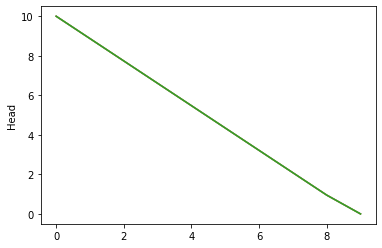

In [7]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx - mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",h)

figure()
plot(h[10:20])
plot(h[20:30])
plot(h[30:40])
ylabel('Head')

print('Discharge=',Q[mg.active_links])
#Discharge from DW equation
L = max(mg.node_x)
deltaH = max(h[mg.nodes_at_left_edge]) - min(h[mg.nodes_at_right_edge])
f=0.1
g=9.8
D_H = 1. 
print('DW discharge = ', D_H**2.*sqrt(2*g*D_H*deltaH/f/L))


### Test Case 2 (single conduit, recharge boundary)

In [4]:
mg = RasterModelGrid((3,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

#mg.at_node['junction__elevation'] = -0.01*mg.node_x + 4.

w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] = w

mg.at_node['input__discharge'][11]=1.475

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
h[mg.nodes_at_left_edge] = 10.
h[mg.nodes_at_right_edge] = 0.


mg.set_closed_boundaries_at_grid_edges(False,True,True,True)
Q[mg.active_links] = 0.1#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg)

for i in arange(500):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt=5.)
    


Number of links =  47
Number of nodes =  30
Number of active links =  8
Number of core nodes =  8
Time iteration: 0
max change in h:  0.192213106708
max change in h:  0.0897300841285
max change in h:  0.0382900522244
max change in h:  0.0145549951547
max change in h:  0.00838954293472
max change in h:  0.0062758678723
max change in h:  0.00425412265377
max change in h:  0.00268483079058
max change in h:  0.00160727199021
max change in h:  0.000924374322019
max change in h:  0.000515749913555
max change in h:  0.000281534255952
max change in h:  0.000151565988195
max change in h:  8.11145959189e-05
average dh= 0.0953126007672   average abs(dQ)= 0.112136044576
Time iteration: 1
max change in h:  0.14033517627
max change in h:  0.0590793921719
max change in h:  0.0240650901889
max change in h:  0.0132506392217
max change in h:  0.0071839634236
max change in h:  0.0036287597445
max change in h:  0.00171187182242
max change in h:  0.000752129739852
max change in h:  0.000304807460432
max ch

max change in h:  0.0218646772033
max change in h:  0.0108603259309
max change in h:  0.00539065960714
max change in h:  0.00267448976095
max change in h:  0.00132653078561
max change in h:  0.000657851420697
max change in h:  0.000326220506982
max change in h:  0.000161767662763
max change in h:  8.02198208447e-05
average dh= 0.0567360069253   average abs(dQ)= 0.0278583702753
Time iteration: 22
max change in h:  0.0214146337204
max change in h:  0.0106404432823
max change in h:  0.00528353271894
max change in h:  0.00262238349436
max change in h:  0.00130119884764
max change in h:  0.000645528934398
max change in h:  0.000320217551701
max change in h:  0.000158837196628
max change in h:  7.87858341544e-05
average dh= 0.0502550205198   average abs(dQ)= 0.0230145285933
Time iteration: 23
max change in h:  0.0209959029771
max change in h:  0.0104356827733
max change in h:  0.00518359308477
max change in h:  0.00257363350073
max change in h:  0.00127740619223
max change in h:  0.000633900

max change in h:  0.000182082456923
max change in h:  9.0280804697e-05
average dh= 0.0297844380767   average abs(dQ)= 0.00635670961162
Time iteration: 49
max change in h:  0.011951537706
max change in h:  0.00594144787972
max change in h:  0.00295126047571
max change in h:  0.0014650597863
max change in h:  0.000726943795644
max change in h:  0.00036057319409
max change in h:  0.000178801301831
max change in h:  8.86463803189e-05
average dh= 0.0292232120264   average abs(dQ)= 0.00620123677144
Time iteration: 50
max change in h:  0.0117418548174
max change in h:  0.00583662403779
max change in h:  0.00289888025985
max change in h:  0.00143890573464
max change in h:  0.000713897979996
max change in h:  0.000354073335583
max change in h:  0.000175566725998
max change in h:  8.7038603521e-05
average dh= 0.0286777980466   average abs(dQ)= 0.00605238295797
Time iteration: 51
max change in h:  0.0115327937131
max change in h:  0.00573230204178
max change in h:  0.0028468712498
max change in h

max change in h:  5.34857440302e-05
average dh= 0.0176177556164   average abs(dQ)= 0.00329137845819
Time iteration: 79
max change in h:  0.00706419348401
max change in h:  0.00351307092233
max change in h:  0.00174581352523
max change in h:  0.00086711659252
max change in h:  0.000430513732028
max change in h:  0.000213683885955
max change in h:  0.000106038921283
max change in h:  5.26128959031e-05
average dh= 0.0173313976946   average abs(dQ)= 0.00322804318636
Time iteration: 80
max change in h:  0.00694829420014
max change in h:  0.00345549034863
max change in h:  0.00171723040859
max change in h:  0.000852936584588
max change in h:  0.000423482228635
max change in h:  0.000210198281175
max change in h:  0.000104311470021
max change in h:  5.1756922991e-05
average dh= 0.0170505367203   average abs(dQ)= 0.00316630001675
Time iteration: 81
max change in h:  0.0068346593755
max change in h:  0.00339903260278
max change in h:  0.00168920345725
max change in h:  0.000839031845332
max cha

max change in h:  0.00108443151759
max change in h:  0.000538846501006
max change in h:  0.00026764993934
max change in h:  0.000132907900612
max change in h:  6.59853206582e-05
average dh= 0.0108062980334   average abs(dQ)= 0.00188582306122
Time iteration: 110
max change in h:  0.004317863508
max change in h:  0.00214807317819
max change in h:  0.00106790879698
max change in h:  0.000530641712516
max change in h:  0.000263577277933
max change in h:  0.000130886925278
max change in h:  6.49826691648e-05
average dh= 0.0106425899528   average abs(dQ)= 0.00185426663281
Time iteration: 111
max change in h:  0.00425211354663
max change in h:  0.00211538061038
max change in h:  0.00105166522962
max change in h:  0.000522575370193
max change in h:  0.000259573246934
max change in h:  0.000128899959798
max change in h:  6.39968671443e-05
average dh= 0.0104816172356   average abs(dQ)= 0.00182333672817
Time iteration: 112
max change in h:  0.00418747314649
max change in h:  0.00208323917545
max 

max change in h:  0.0026731183287
max change in h:  0.00133008364047
max change in h:  0.000661386494927
max change in h:  0.000328716647751
max change in h:  0.000163317637229
max change in h:  8.11204102487e-05
average dh= 0.00660563877489   average abs(dQ)= 0.00111025054936
Time iteration: 143
max change in h:  0.00263419488966
max change in h:  0.0013107219839
max change in h:  0.000651762079467
max change in h:  0.000323934917748
max change in h:  0.000160942806279
max change in h:  7.99412838655e-05
average dh= 0.00650982771173   average abs(dQ)= 0.00109316305448
Time iteration: 144
max change in h:  0.00259587464145
max change in h:  0.00129166019688
max change in h:  0.000642286627571
max change in h:  0.000319227145495
max change in h:  0.000158604678835
max change in h:  7.87803670432e-05
average dh= 0.00641549014029   average abs(dQ)= 0.00107636792895
Time iteration: 145
max change in h:  0.00255814713277
max change in h:  0.00127289308782
max change in h:  0.000632957562651

max change in h:  0.000198214071883
max change in h:  9.84938524464e-05
average dh= 0.00398820141268   average abs(dQ)= 0.000655102536023
Time iteration: 178
max change in h:  0.00158863858886
max change in h:  0.000790557510788
max change in h:  0.000393155738392
max change in h:  0.000195429937989
max change in h:  9.71105534937e-05
average dh= 0.00393233215866   average abs(dQ)= 0.000646553984825
Time iteration: 179
max change in h:  0.00156631046113
max change in h:  0.000779446479459
max change in h:  0.000387630477135
max change in h:  0.000192683769676
max change in h:  9.57461709206e-05
average dh= 0.00387720198447   average abs(dQ)= 0.000637748731253
Time iteration: 180
max change in h:  0.0015442923351
max change in h:  0.000768490377357
max change in h:  0.000382182491178
max change in h:  0.000189976088565
max change in h:  9.44009366002e-05
average dh= 0.00382282470431   average abs(dQ)= 0.000628840350585
Time iteration: 181
max change in h:  0.00152258605685
max change in

max change in h:  0.000112977182253
max change in h:  5.61441091449e-05
average dh= 0.0022748984514   average abs(dQ)= 0.000369303624499
Time iteration: 218
max change in h:  0.000905455215117
max change in h:  0.000450613763956
max change in h:  0.000224114001899
max change in h:  0.000111412012789
max change in h:  5.53663898657e-05
average dh= 0.00224341193791   average abs(dQ)= 0.000364089062366
Time iteration: 219
max change in h:  0.000892910970661
max change in h:  0.000444371508639
max change in h:  0.000221009721816
max change in h:  0.000109868979631
max change in h:  5.45996673189e-05
average dh= 0.00221236991584   average abs(dQ)= 0.00035895100431
Time iteration: 220
max change in h:  0.000880544145893
max change in h:  0.000438217524426
max change in h:  0.00021794932999
max change in h:  0.000108347756999
max change in h:  5.38437797388e-05
average dh= 0.00218176586658   average abs(dQ)= 0.00035388824657
Time iteration: 221
max change in h:  0.000868352129579
max change i

max change in h:  0.000469343500949
max change in h:  0.000233580044039
max change in h:  0.000116175133691
max change in h:  5.7755473998e-05
average dh= 0.00116380557319   average abs(dQ)= 0.000188656515285
Time iteration: 267
max change in h:  0.000463004885983
max change in h:  0.000230425630436
max change in h:  0.000114606313923
max change in h:  5.69755931927e-05
average dh= 0.00114809791667   average abs(dQ)= 0.000186084367446
Time iteration: 268
max change in h:  0.000456752794065
max change in h:  0.000227314270992
max change in h:  0.000113058904514
max change in h:  5.62063545484e-05
average dh= 0.00113260440677   average abs(dQ)= 0.000183547987372
Time iteration: 269
max change in h:  0.000450586019292
max change in h:  0.000224245365761
max change in h:  0.000111532607175
max change in h:  5.54476098351e-05
average dh= 0.00111732206588   average abs(dQ)= 0.000181046858666
Time iteration: 270
max change in h:  0.000444503373256
max change in h:  0.000221218323482
max chang

max change in h:  0.00021535552678
max change in h:  0.0001071743414
max change in h:  5.33046438758e-05
average dh= 0.000534389504835   average abs(dQ)= 8.72206991867e-05
Time iteration: 326
max change in h:  0.000212554366657
max change in h:  0.000105780339794
max change in h:  5.26113346435e-05
average dh= 0.000527440594566   average abs(dQ)= 8.60813026339e-05
Time iteration: 327
max change in h:  0.000209789820174
max change in h:  0.000104404558236
max change in h:  5.19270867514e-05
average dh= 0.000520582461991   average abs(dQ)= 8.49569262996e-05
Time iteration: 328
max change in h:  0.00020706140414
max change in h:  0.000103046756294
max change in h:  5.12517806364e-05
average dh= 0.00051381391037   average abs(dQ)= 8.38473686452e-05
Time iteration: 329
max change in h:  0.00020436864185
max change in h:  0.000101706696768
max change in h:  5.0585298343e-05
average dh= 0.000507133759021   average abs(dQ)= 8.27524309286e-05
Time iteration: 330
max change in h:  0.000201711063

max change in h:  8.86414113488e-05
average dh= 0.000220423514765   average abs(dQ)= 3.64861656823e-05
Time iteration: 400
max change in h:  8.77181479524e-05
average dh= 0.000218129628282   average abs(dQ)= 3.6110966089e-05
Time iteration: 401
max change in h:  8.68043897562e-05
average dh= 0.000215859358428   average abs(dQ)= 3.57393875468e-05
Time iteration: 402
max change in h:  8.5900083139e-05
average dh= 0.000213611795995   average abs(dQ)= 3.53710416834e-05
Time iteration: 403
max change in h:  8.50051576968e-05
average dh= 0.000211386572008   average abs(dQ)= 3.50052753255e-05
Time iteration: 404
max change in h:  8.41195329464e-05
average dh= 0.000209183780602   average abs(dQ)= 3.46417501065e-05
Time iteration: 405
max change in h:  8.32431229014e-05
average dh= 0.000207003718088   average abs(dQ)= 3.42806268323e-05
Time iteration: 406
max change in h:  8.23758391668e-05
average dh= 0.000204846608751   average abs(dQ)= 3.39224291646e-05
Time iteration: 407
max change in h:  

max change in h:  3.75727030839e-05
average dh= 9.34385266073e-05   average abs(dQ)= 1.54585061797e-05
Time iteration: 482
max change in h:  3.71816636537e-05
average dh= 9.24661077382e-05   average abs(dQ)= 1.52975010978e-05
Time iteration: 483
max change in h:  3.67946974755e-05
average dh= 9.15038170889e-05   average abs(dQ)= 1.51381756102e-05
Time iteration: 484
max change in h:  3.64117620517e-05
average dh= 9.05515489985e-05   average abs(dQ)= 1.49805121394e-05
Time iteration: 485
max change in h:  3.60328153217e-05
average dh= 8.96091989123e-05   average abs(dQ)= 1.48244932929e-05
Time iteration: 486
max change in h:  3.56578156726e-05
average dh= 8.86766633701e-05   average abs(dQ)= 1.46701018621e-05
Time iteration: 487
max change in h:  3.52867219231e-05
average dh= 8.7753839994e-05   average abs(dQ)= 1.45173208196e-05
Time iteration: 488
max change in h:  3.49194933236e-05
average dh= 8.68406274775e-05   average abs(dQ)= 1.43661333178e-05
Time iteration: 489
max change in h: 

Node net fluxes =  [ -2.94975180e+00   2.38044579e-04   2.18147343e-04   1.89328211e-04
   1.52768250e-04   1.09963839e-04   6.26651320e-05   1.28296020e-05]
Node head =  [ 10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  10.           8.69956016   7.59104337   6.48287607   5.37502898
   4.26745977   3.16011475   2.05293108   0.94583938   0.
  10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
Discharge= [-1.4747518  -1.47451375 -1.47429561 -1.47410628 -1.47395351 -1.47384354
 -1.47378088 -1.47376805]
DW discharge =  1.47572957475


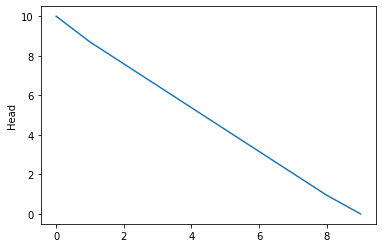

In [5]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx - mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",h)

figure()
plot(h[10:20])
#plot(h[20:30])
#plot(h[30:40])
ylabel('Head')

print('Discharge=',Q[mg.active_links])
#Discharge from DW equation
L = max(mg.node_x)
deltaH = max(h[mg.nodes_at_left_edge]) - min(h[mg.nodes_at_right_edge])
f=0.1
g=9.8
D_H = 1. 
print('DW discharge = ', D_H**2.*sqrt(2*g*D_H*deltaH/f/L))


In [47]:
mg = RasterModelGrid((5,5),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

mg.at_node['junction__elevation'] = -0.01*mg.node_x + 4.


w = mg.add_zeros('link','width')
mg.at_link['width']= 0.5*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] = w

mg.at_node['input__discharge'][12]=0.05

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= w#mg.at_link['hydraulic__diameter']#applicable for square conduits



#set heads at edges
h[mg.nodes_at_left_edge] = 4.2
h[mg.nodes_at_right_edge] = 0.5
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.

mg.set_closed_boundaries_at_grid_edges(False,True,False,True)
Q[mg.active_links] = 0.#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)


pfn = PresFlowNetwork(mg)


Number of links =  40
Number of nodes =  25
Number of active links =  18
Number of core nodes =  9


In [48]:
pfn.dyn_wave_solution(dt=10.)

max change in h:  7.80403120272e-12
average dh= -0.00555536343264   average abs(dQ)= 5.47092596553e-09


In [49]:
mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx - mg.at_node['input__discharge'][mg.core_nodes]

array([  1.03008100e-06,  -1.22622173e-08,   1.22656216e-07,
         1.01781850e-06,  -4.99999509e-02,   1.10393716e-07,
         1.03008100e-06,  -1.22622173e-08,   1.22656216e-07])

In [50]:
for i in arange(5000):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt=5.)

Time iteration: 0
max change in h:  6.60269739163e-08
average dh= -0.002777655468   average abs(dQ)= 1.86156762272e-07
Time iteration: 1
max change in h:  1.75509659952e-07
average dh= -0.00277760012041   average abs(dQ)= 4.72517706018e-07
Time iteration: 2
max change in h:  1.15112804961e-06
average dh= -0.00277653964413   average abs(dQ)= 3.32945720327e-06
Time iteration: 3
max change in h:  8.19346195251e-06
average dh= -0.00276877668389   average abs(dQ)= 2.37080258455e-05
Time iteration: 4
max change in h:  5.75063994169e-05
average dh= -0.002714654416   average abs(dQ)= 0.000161452073798
Time iteration: 5
max change in h:  0.000365437087194
max change in h:  0.000739556734112
max change in h:  0.00147769515544
max change in h:  0.00266938771089
max change in h:  0.00346188128623
max change in h:  0.00212957072347
max change in h:  0.00116130073903
max change in h:  0.000903587535386
max change in h:  0.00076582909096
max change in h:  0.000590465972358
max change in h:  0.0004231

max change in h:  0.00212396510113
max change in h:  0.00105933810706
max change in h:  0.00052832470665
max change in h:  0.0002634860686
max change in h:  0.000131404426591
max change in h:  6.55330400898e-05
average dh= 0.00953432167322   average abs(dQ)= 0.000695254438384
Time iteration: 31
max change in h:  0.00849088458793
max change in h:  0.00423624134281
max change in h:  0.00211304467136
max change in h:  0.00105387883489
max change in h:  0.000525595350987
max change in h:  0.000262121475554
max change in h:  0.000130722158412
max change in h:  6.51919173037e-05
average dh= 0.00884047329133   average abs(dQ)= 0.000695366674991
Time iteration: 32
max change in h:  0.00844717416978
max change in h:  0.00421439451037
max change in h:  0.00210212429115
max change in h:  0.00104841959968
max change in h:  0.000522866018141
max change in h:  0.000260756895372
max change in h:  0.00013003989715
max change in h:  6.48507981453e-05
average dh= 0.00815607427303   average abs(dQ)= 0.00

max change in h:  0.00364639113135
max change in h:  0.00181821345053
max change in h:  0.000906493971439
max change in h:  0.000451912431258
max change in h:  0.000225282971948
max change in h:  0.000112303897669
max change in h:  5.59831715816e-05
average dh= 0.00855262047023   average abs(dQ)= 7.84724990671e-05
Time iteration: 59
max change in h:  0.00726697589461
max change in h:  0.00362454541947
max change in h:  0.00180729460437
max change in h:  0.000901035915609
max change in h:  0.000449183841845
max change in h:  0.000223918817136
max change in h:  0.000111621867459
max change in h:  5.56421744404e-05
average dh= 0.008491601779   average abs(dQ)= 8.50456580232e-05
Time iteration: 60
max change in h:  0.00722326410741
max change in h:  0.0036026997516
max change in h:  0.00179637582313
max change in h:  0.000895577911218
max change in h:  0.000446455285511
max change in h:  0.000222554681523
max change in h:  0.000110939847783
max change in h:  5.53011829005e-05
average dh= 0

max change in h:  0.00591304727069
max change in h:  0.00294793138198
max change in h:  0.00146913488545
max change in h:  0.000732009243039
max change in h:  0.000364688488035
max change in h:  0.000181677126901
max change in h:  9.05030841598e-05
average dh= 0.00555059719375   average abs(dQ)= 0.000186789680641
Time iteration: 91
max change in h:  0.00586941647181
max change in h:  0.00292612884052
max change in h:  0.00145823930327
max change in h:  0.000726563608337
max change in h:  0.000361966433349
max change in h:  0.000180316363032
max change in h:  8.98227948687e-05
average dh= 0.005610457258   average abs(dQ)= 0.000166598262079
Time iteration: 92
max change in h:  0.00582578555304
max change in h:  0.00290432633869
max change in h:  0.00144734380664
max change in h:  0.000721118049009
max change in h:  0.000359244430419
max change in h:  0.000178955630653
max change in h:  8.91425234681e-05
average dh= 0.00564890018765   average abs(dQ)= 0.000143672111745
Time iteration: 93


max change in h:  0.0012540985102
max change in h:  0.000635781531803
max change in h:  0.000322016746158
max change in h:  0.000162945570888
max change in h:  8.23800531517e-05
average dh= 0.013269101403   average abs(dQ)= 0.00114841571367
Time iteration: 123
max change in h:  0.00993316442165
max change in h:  0.00502562674601
max change in h:  0.00254376645547
max change in h:  0.00128716861787
max change in h:  0.000650928531355
max change in h:  0.000328948489921
max change in h:  0.000166118401653
max change in h:  8.38337857682e-05
average dh= 0.0136860358592   average abs(dQ)= 0.00103196647473
Time iteration: 124
max change in h:  0.0102150214285
max change in h:  0.00515680493899
max change in h:  0.00260429596405
max change in h:  0.00131497636376
max change in h:  0.00066367909743
max change in h:  0.000334792784201
max change in h:  0.000168798944575
max change in h:  8.50649598541e-05
average dh= 0.0140682618534   average abs(dQ)= 0.000921264237489
Time iteration: 125
max 

max change in h:  0.0065329461347
max change in h:  0.00328738292831
max change in h:  0.00165431253432
max change in h:  0.000832443614998
max change in h:  0.000418845890636
max change in h:  0.000210731131498
max change in h:  0.000106022518426
max change in h:  5.33437012651e-05
average dh= 0.0175259008221   average abs(dQ)= 0.000302323153849
Time iteration: 153
max change in h:  0.013171037588
max change in h:  0.00662510896185
max change in h:  0.00333392665474
max change in h:  0.00167783281972
max change in h:  0.000844333818708
max change in h:  0.000424858532905
max change in h:  0.000213772541014
max change in h:  0.000107561522285
max change in h:  5.41227880011e-05
average dh= 0.0176889437369   average abs(dQ)= 0.000318285416172
Time iteration: 154
max change in h:  0.0133579123823
max change in h:  0.00671943656638
max change in h:  0.00338159798227
max change in h:  0.00170193995715
max change in h:  0.000856528820918
max change in h:  0.000431029103468
max change in h: 

max change in h:  0.00962575373434
max change in h:  0.00475703590833
max change in h:  0.00235079652519
max change in h:  0.00116209250248
max change in h:  0.000574768986767
max change in h:  0.000284444941128
max change in h:  0.000140847136245
max change in h:  6.97776867548e-05
average dh= 0.00922597952743   average abs(dQ)= 0.000578509057523
Time iteration: 179
max change in h:  0.0189383177621
max change in h:  0.0093796546124
max change in h:  0.00464188722708
max change in h:  0.00229682615617
max change in h:  0.00113665303599
max change in h:  0.000562677124338
max change in h:  0.000278639177019
max change in h:  0.000138028938775
max change in h:  6.83946178678e-05
average dh= 0.00902588852854   average abs(dQ)= 0.000513376875608
Time iteration: 180
max change in h:  0.0184865217751
max change in h:  0.00916491608619
max change in h:  0.00453993424214
max change in h:  0.00224824425631
max change in h:  0.0011133488046
max change in h:  0.000551403917725
max change in h:  

max change in h:  6.55167669121e-05
average dh= 0.00491684287698   average abs(dQ)= 0.00237069840172
Time iteration: 205
max change in h:  0.00794533357709
max change in h:  0.00408542459496
max change in h:  0.00209028501825
max change in h:  0.00105992644688
max change in h:  0.00053138763581
max change in h:  0.000263009587917
max change in h:  0.000128384218828
max change in h:  6.17516062033e-05
average dh= 0.0040928545534   average abs(dQ)= 0.00241672182614
Time iteration: 206
max change in h:  0.00828869503054
max change in h:  0.00417029465434
max change in h:  0.00208601258935
max change in h:  0.00103453362395
max change in h:  0.000507770084911
max change in h:  0.000246340759446
max change in h:  0.000118009117595
max change in h:  5.57683445648e-05
average dh= 0.0031610761668   average abs(dQ)= 0.00255040272614
Time iteration: 207
max change in h:  0.00817705773302
max change in h:  0.00403637815246
max change in h:  0.00197868625928
max change in h:  0.000961767154036
max

max change in h:  0.00215783786833
max change in h:  0.00109940314431
max change in h:  0.000559865958413
max change in h:  0.00028493539395
max change in h:  0.000144856382454
max change in h:  7.3526561378e-05
average dh= 0.00357034419727   average abs(dQ)= 0.00138707489714
Time iteration: 246
max change in h:  0.00233341502917
max change in h:  0.0011769193447
max change in h:  0.000592591485092
max change in h:  0.000297995657133
max change in h:  0.000149644843748
max change in h:  7.50224672728e-05
average dh= 0.00386986312294   average abs(dQ)= 0.00130572594479
Time iteration: 247
max change in h:  0.0024582312915
max change in h:  0.00122874313242
max change in h:  0.000612331207078
max change in h:  0.000304499593686
max change in h:  0.000151127881941
max change in h:  7.48552024814e-05
average dh= 0.0040895633722   average abs(dQ)= 0.00121165627875
Time iteration: 248
max change in h:  0.00252865494739
max change in h:  0.00125339535426
max change in h:  0.000618552144325
ma

max change in h:  5.38660372236e-05
average dh= 0.000188480788135   average abs(dQ)= 0.00058453395726
Time iteration: 290
max change in h:  0.000911237085253
max change in h:  0.000444757020323
max change in h:  0.000215638519135
max change in h:  0.000103909142353
max change in h:  4.97708625953e-05
average dh= 0.000455002570157   average abs(dQ)= 0.000608757869654
Time iteration: 291
max change in h:  0.000852869758002
max change in h:  0.000413429219821
max change in h:  0.000198826673672
max change in h:  9.49188354493e-05
average dh= 0.000703658637127   average abs(dQ)= 0.000621304606631
Time iteration: 292
max change in h:  0.000784502115035
max change in h:  0.000377388986897
max change in h:  0.000179836186442
max change in h:  8.70420442887e-05
average dh= 0.000931807159556   average abs(dQ)= 0.0006290882223
Time iteration: 293
max change in h:  0.000705419593551
max change in h:  0.000362367798909
max change in h:  0.000189446187199
max change in h:  9.89627819803e-05
average

max change in h:  0.000399820824124
max change in h:  0.000195848075291
max change in h:  9.53654593157e-05
average dh= 0.000134579682197   average abs(dQ)= 0.000263820456299
Time iteration: 342
max change in h:  0.000380022679507
max change in h:  0.000185029114546
max change in h:  8.94635070479e-05
average dh= 0.000241649378921   average abs(dQ)= 0.000272669701752
Time iteration: 343
max change in h:  0.000355201712011
max change in h:  0.000171796572404
max change in h:  8.24120714578e-05
average dh= 0.000342496964013   average abs(dQ)= 0.000276697033633
Time iteration: 344
max change in h:  0.00032586529918
max change in h:  0.000156414101482
max change in h:  7.65366540088e-05
average dh= 0.000435575440777   average abs(dQ)= 0.000276211606386
Time iteration: 345
max change in h:  0.000321030804012
max change in h:  0.000165777477107
max change in h:  8.55943802471e-05
average dh= 0.000519577869453   average abs(dQ)= 0.000271423010872
Time iteration: 346
max change in h:  0.000357

max change in h:  0.000195182589617
max change in h:  9.65048897563e-05
average dh= 0.000358145296782   average abs(dQ)= 9.27363373501e-05
Time iteration: 406
max change in h:  0.000194772506868
max change in h:  9.5760215701e-05
average dh= 0.000363485480843   average abs(dQ)= 8.61630616035e-05
Time iteration: 407
max change in h:  0.000191719494782
max change in h:  9.37330326458e-05
average dh= 0.000363880398928   average abs(dQ)= 8.18038065136e-05
Time iteration: 408
max change in h:  0.000186145513597
max change in h:  9.04907210764e-05
average dh= 0.00035945221198   average abs(dQ)= 7.69568277181e-05
Time iteration: 409
max change in h:  0.000178207155496
max change in h:  9.14130355892e-05
average dh= 0.000350385816765   average abs(dQ)= 7.52756244732e-05
Time iteration: 410
max change in h:  0.000192594646731
max change in h:  0.000100077678681
max change in h:  5.19509773048e-05
average dh= 0.000335770577913   average abs(dQ)= 7.41001382387e-05
Time iteration: 411
max change i

max change in h:  1.19395172153e-05
average dh= -0.000128325026484   average abs(dQ)= 2.876676456e-05
Time iteration: 499
max change in h:  1.63932641368e-05
average dh= -0.000126967617712   average abs(dQ)= 2.72786079191e-05
Time iteration: 500
max change in h:  2.06166164807e-05
average dh= -0.00012441855637   average abs(dQ)= 2.67877519221e-05
Time iteration: 501
max change in h:  2.45731319928e-05
average dh= -0.000120725901726   average abs(dQ)= 2.61906441549e-05
Time iteration: 502
max change in h:  2.82290006561e-05
average dh= -0.000115947659299   average abs(dQ)= 2.53553209316e-05
Time iteration: 503
max change in h:  3.15533925672e-05
average dh= -0.000110151027661   average abs(dQ)= 2.42948338951e-05
Time iteration: 504
max change in h:  3.45187918622e-05
average dh= -0.00010341157944   average abs(dQ)= 2.30240417541e-05
Time iteration: 505
max change in h:  3.71013085152e-05
average dh= -9.58123842378e-05   average abs(dQ)= 2.21228588129e-05
Time iteration: 506
max change i

max change in h:  2.91539245931e-05
average dh= 4.18110755352e-05   average abs(dQ)= 9.25876190653e-06
Time iteration: 600
max change in h:  3.04103997991e-05
average dh= 3.92173083408e-05   average abs(dQ)= 8.77084326845e-06
Time iteration: 601
max change in h:  3.13478031202e-05
average dh= 3.62965233438e-05   average abs(dQ)= 8.44662922511e-06
Time iteration: 602
max change in h:  3.19634386401e-05
average dh= 3.30835291119e-05   average abs(dQ)= 8.58547577261e-06
Time iteration: 603
max change in h:  3.22577920774e-05
average dh= 2.9615266378e-05   average abs(dQ)= 9.04049311068e-06
Time iteration: 604
max change in h:  3.22344624789e-05
average dh= 2.59304044291e-05   average abs(dQ)= 9.41023056744e-06
Time iteration: 605
max change in h:  3.19000643015e-05
average dh= 2.20689289379e-05   average abs(dQ)= 9.68144877399e-06
Time iteration: 606
max change in h:  3.12641014583e-05
average dh= 1.80717255586e-05   average abs(dQ)= 9.85353467835e-06
Time iteration: 607
max change in h: 

max change in h:  6.76020836332e-06
average dh= 1.03420220075e-06   average abs(dQ)= 4.36758940723e-06
Time iteration: 708
max change in h:  6.55461897514e-06
average dh= 2.5349227989e-06   average abs(dQ)= 4.52998062445e-06
Time iteration: 709
max change in h:  6.2899250004e-06
average dh= 3.98131342894e-06   average abs(dQ)= 4.64545025545e-06
Time iteration: 710
max change in h:  5.96985187151e-06
average dh= 5.36050215327e-06   average abs(dQ)= 4.71381184232e-06
Time iteration: 711
max change in h:  5.59858455729e-06
average dh= 6.66051964345e-06   average abs(dQ)= 4.73533714141e-06
Time iteration: 712
max change in h:  5.18071832989e-06
average dh= 7.87039696286e-06   average abs(dQ)= 4.71074468868e-06
Time iteration: 713
max change in h:  5.51322332498e-06
average dh= 8.98025181729e-06   average abs(dQ)= 4.64118425494e-06
Time iteration: 714
max change in h:  5.94566368539e-06
average dh= 9.98136265378e-06   average abs(dQ)= 4.53819884345e-06
Time iteration: 715
max change in h:  

max change in h:  5.26038485882e-07
average dh= -4.15127801744e-06   average abs(dQ)= 1.67206875406e-06
Time iteration: 812
max change in h:  1.32854852009e-07
average dh= -4.43811491961e-06   average abs(dQ)= 1.60604257579e-06
Time iteration: 813
max change in h:  -2.53757441504e-07
average dh= -4.6764176566e-06   average abs(dQ)= 1.5258449998e-06
Time iteration: 814
max change in h:  -2.4783530117e-07
average dh= -4.86485758263e-06   average abs(dQ)= 1.43253295099e-06
Time iteration: 815
max change in h:  -4.58284850069e-08
average dh= -5.00261340449e-06   average abs(dQ)= 1.33385578704e-06
Time iteration: 816
max change in h:  1.52596141945e-07
average dh= -5.08936892852e-06   average abs(dQ)= 1.25447215149e-06
Time iteration: 817
max change in h:  3.45597487073e-07
average dh= -5.12530599016e-06   average abs(dQ)= 1.18826273142e-06
Time iteration: 818
max change in h:  5.31423139272e-07
average dh= -5.11109273152e-06   average abs(dQ)= 1.13793484056e-06
Time iteration: 819
max chan

max change in h:  1.01720586132e-06
average dh= 1.94930056351e-06   average abs(dQ)= 4.50896560279e-07
Time iteration: 914
max change in h:  9.98881962921e-07
average dh= 1.94277983768e-06   average abs(dQ)= 4.31532480332e-07
Time iteration: 915
max change in h:  9.71286649332e-07
average dh= 1.91764722047e-06   average abs(dQ)= 4.10779060689e-07
Time iteration: 916
max change in h:  9.55738331143e-07
average dh= 1.87451651073e-06   average abs(dQ)= 4.04776347821e-07
Time iteration: 917
max change in h:  1.03959317821e-06
average dh= 1.81416291992e-06   average abs(dQ)= 3.94988255237e-07
Time iteration: 918
max change in h:  1.11174499318e-06
average dh= 1.73751237082e-06   average abs(dQ)= 3.81584734411e-07
Time iteration: 919
max change in h:  1.17173120395e-06
average dh= 1.64562955442e-06   average abs(dQ)= 3.64767241605e-07
Time iteration: 920
max change in h:  1.21921588359e-06
average dh= 1.53970488534e-06   average abs(dQ)= 3.44766164233e-07
Time iteration: 921
max change in h:

max change in h:  2.55231600299e-07
average dh= -3.77952785317e-07   average abs(dQ)= 1.43570130977e-07
Time iteration: 1021
max change in h:  2.65262704691e-07
average dh= -3.18919876673e-07   average abs(dQ)= 1.47308095927e-07
Time iteration: 1022
max change in h:  2.72534895984e-07
average dh= -2.57988449354e-07   average abs(dQ)= 1.49550549574e-07
Time iteration: 1023
max change in h:  2.77033071594e-07
average dh= -1.95784132758e-07   average abs(dQ)= 1.50305688452e-07
Time iteration: 1024
max change in h:  2.78769189954e-07
average dh= -1.32932354531e-07   average abs(dQ)= 1.53071826433e-07
Time iteration: 1025
max change in h:  2.77781609714e-07
average dh= -7.0052312077e-08   average abs(dQ)= 1.59336784433e-07
Time iteration: 1026
max change in h:  2.7413419712e-07
average dh= -7.75112428371e-09   average abs(dQ)= 1.67537406823e-07
Time iteration: 1027
max change in h:  2.67915200691e-07
average dh= 5.33817836996e-08   average abs(dQ)= 1.75475880323e-07
Time iteration: 1028
max

max change in h:  9.50219055662e-08
average dh= -8.64769778847e-08   average abs(dQ)= 7.15656843133e-08
Time iteration: 1127
max change in h:  8.02286937995e-08
average dh= -1.05828940814e-07   average abs(dQ)= 7.17048354238e-08
Time iteration: 1128
max change in h:  6.49567690747e-08
average dh= -1.2377387488e-07   average abs(dQ)= 7.11495182869e-08
Time iteration: 1129
max change in h:  4.93630022413e-08
average dh= -1.40166754201e-07   average abs(dQ)= 6.99189488502e-08
Time iteration: 1130
max change in h:  3.36042377258e-08
average dh= -1.54880418753e-07   average abs(dQ)= 6.82893967942e-08
Time iteration: 1131
max change in h:  1.78357812963e-08
average dh= -1.67806444406e-07   average abs(dQ)= 6.6139398517e-08
Time iteration: 1132
max change in h:  2.20993245925e-09
average dh= -1.78855814855e-07   average abs(dQ)= 6.33942988067e-08
Time iteration: 1133
max change in h:  -1.3125424525e-08
average dh= -1.87959392946e-07   average abs(dQ)= 6.00924537148e-08
Time iteration: 1134
ma

max change in h:  3.0051623412e-08
average dh= -8.35443707319e-08   average abs(dQ)= 1.87426392913e-08
Time iteration: 1209
max change in h:  3.19934048143e-08
average dh= -7.69017600865e-08   average abs(dQ)= 1.86162367628e-08
Time iteration: 1210
max change in h:  3.3587820969e-08
average dh= -6.96498720227e-08   average abs(dQ)= 1.91642064576e-08
Time iteration: 1211
max change in h:  3.53056175406e-08
average dh= -6.18708181426e-08   average abs(dQ)= 2.01071842787e-08
Time iteration: 1212
max change in h:  3.71024633239e-08
average dh= -5.36501568458e-08   average abs(dQ)= 2.08373857169e-08
Time iteration: 1213
max change in h:  3.85055507479e-08
average dh= -4.5075999235e-08   average abs(dQ)= 2.13520125225e-08
Time iteration: 1214
max change in h:  3.95092021321e-08
average dh= -3.62381082524e-08   average abs(dQ)= 2.16504017087e-08
Time iteration: 1215
max change in h:  4.01117068449e-08
average dh= -2.72269998459e-08   average abs(dQ)= 2.17339894317e-08
Time iteration: 1216
max

max change in h:  2.07446628764e-08
average dh= 1.59122957449e-10   average abs(dQ)= 1.28217349371e-08
Time iteration: 1283
max change in h:  2.02422172357e-08
average dh= 4.78098933777e-09   average abs(dQ)= 1.34020025988e-08
Time iteration: 1284
max change in h:  1.95545331039e-08
average dh= 9.26451228197e-09   average abs(dQ)= 1.38414106686e-08
Time iteration: 1285
max change in h:  1.86919395517e-08
average dh= 1.35692023999e-08   average abs(dQ)= 1.41385310825e-08
Time iteration: 1286
max change in h:  1.76662489082e-08
average dh= 1.76571032909e-08   average abs(dQ)= 1.42933367966e-08
Time iteration: 1287
max change in h:  1.64906079902e-08
average dh= 2.14931071527e-08   average abs(dQ)= 1.4307174186e-08
Time iteration: 1288
max change in h:  1.57291637493e-08
average dh= 2.50452366037e-08   average abs(dQ)= 1.41827224905e-08
Time iteration: 1289
max change in h:  1.71581575614e-08
average dh= 2.82848906939e-08   average abs(dQ)= 1.39239417101e-08
Time iteration: 1290
max chang

max change in h:  1.35017723668e-08
average dh= 1.65489346687e-08   average abs(dQ)= 3.71672228832e-09
Time iteration: 1369
max change in h:  1.38443123632e-08
average dh= 1.52102533248e-08   average abs(dQ)= 3.72208329222e-09
Time iteration: 1370
max change in h:  1.40464695431e-08
average dh= 1.37515596875e-08   average abs(dQ)= 3.84577044104e-09
Time iteration: 1371
max change in h:  1.41090945593e-08
average dh= 1.21893196552e-08   average abs(dQ)= 4.02978892154e-09
Time iteration: 1372
max change in h:  1.40343680011e-08
average dh= 1.05406694231e-08   average abs(dQ)= 4.17126242475e-09
Time iteration: 1373
max change in h:  1.38257509885e-08
average dh= 8.82323679068e-09   average abs(dQ)= 4.26967522457e-09
Time iteration: 1374
max change in h:  1.34879279967e-08
average dh= 7.05496130686e-09   average abs(dQ)= 4.32493724274e-09
Time iteration: 1375
max change in h:  1.30267359122e-08
average dh= 5.25391501572e-09   average abs(dQ)= 4.33737636629e-09
Time iteration: 1376
max chan

max change in h:  2.56615750871e-09
average dh= -5.19481668755e-09   average abs(dQ)= 1.46706364742e-09
Time iteration: 1467
max change in h:  2.7034490202e-09
average dh= -4.59859356332e-09   average abs(dQ)= 1.53608125327e-09
Time iteration: 1468
max change in h:  2.8351059278e-09
average dh= -3.96990757311e-09   average abs(dQ)= 1.58890403352e-09
Time iteration: 1469
max change in h:  2.93678681373e-09
average dh= -3.31547103975e-09   average abs(dQ)= 1.62534557435e-09
Time iteration: 1470
max change in h:  3.00810931719e-09
average dh= -2.64211074797e-09   average abs(dQ)= 1.6453812466e-09
Time iteration: 1471
max change in h:  3.04899128167e-09
average dh= -1.9566998071e-09   average abs(dQ)= 1.64914509173e-09
Time iteration: 1472
max change in h:  3.05964587e-09
average dh= -1.26609042647e-09   average abs(dQ)= 1.7010889761e-09
Time iteration: 1473
max change in h:  3.0405735707e-09
average dh= -5.77048228622e-10   average abs(dQ)= 1.76477864823e-09
Time iteration: 1474
max chang

max change in h:  6.65462018823e-10
average dh= -1.41048501969e-09   average abs(dQ)= 7.77876751092e-10
Time iteration: 1577
max change in h:  4.93632135168e-10
average dh= -1.58539573941e-09   average abs(dQ)= 7.62349386618e-10
Time iteration: 1578
max change in h:  3.20469206727e-10
average dh= -1.74152291967e-09   average abs(dQ)= 7.43612932375e-10
Time iteration: 1579
max change in h:  1.47670098372e-10
average dh= -1.87773529963e-09   average abs(dQ)= 7.18153605627e-10
Time iteration: 1580
max change in h:  -2.3105406477e-11
average dh= -1.99311630199e-09   average abs(dQ)= 6.86274709704e-10
Time iteration: 1581
max change in h:  -1.54737556102e-10
average dh= -2.08696858525e-09   average abs(dQ)= 6.48411842648e-10
Time iteration: 1582
max change in h:  -6.58895160655e-11
average dh= -2.1588163969e-09   average abs(dQ)= 6.0504965613e-10
Time iteration: 1583
max change in h:  2.18216555936e-11
average dh= -2.20840573873e-09   average abs(dQ)= 5.67285699005e-10
Time iteration: 1584


max change in h:  4.41435776821e-10
average dh= 8.51996497666e-10   average abs(dQ)= 1.93311137139e-10
Time iteration: 1682
max change in h:  4.31463753614e-10
average dh= 8.45221350047e-10   average abs(dQ)= 1.84037551643e-10
Time iteration: 1683
max change in h:  4.17528234209e-10
average dh= 8.30428047901e-10   average abs(dQ)= 1.78562757819e-10
Time iteration: 1684
max change in h:  4.36053415598e-10
average dh= 8.07919285855e-10   average abs(dQ)= 1.7513731559e-10
Time iteration: 1685
max change in h:  4.70297245592e-10
average dh= 7.78066140583e-10   average abs(dQ)= 1.70090813277e-10
Time iteration: 1686
max change in h:  4.99321251013e-10
average dh= 7.41303140801e-10   average abs(dQ)= 1.63504222279e-10
Time iteration: 1687
max change in h:  5.22949239468e-10
average dh= 6.98122804442e-10   average abs(dQ)= 1.55471820106e-10
Time iteration: 1688
max change in h:  5.41061306869e-10
average dh= 6.49069714989e-10   average abs(dQ)= 1.46099961306e-10
Time iteration: 1689
max chang

max change in h:  8.65698623898e-11
average dh= -2.6442005232e-10   average abs(dQ)= 5.89219690801e-11
Time iteration: 1784
max change in h:  9.30957533285e-11
average dh= -2.4564003003e-10   average abs(dQ)= 5.55393296293e-11
Time iteration: 1785
max change in h:  9.85940218357e-11
average dh= -2.24865202014e-10   average abs(dQ)= 5.66107312629e-11
Time iteration: 1786
max change in h:  1.0303136122e-10
average dh= -2.02335774185e-10   average abs(dQ)= 5.90451575694e-11
Time iteration: 1787
max change in h:  1.08842268531e-10
average dh= -1.7830408628e-10   average abs(dQ)= 6.16670177824e-11
Time iteration: 1788
max change in h:  1.13851150729e-10
average dh= -1.53031931926e-10   average abs(dQ)= 6.36417044418e-11
Time iteration: 1789
max change in h:  1.1766143615e-10
average dh= -1.26787847929e-10   average abs(dQ)= 6.49630652061e-11
Time iteration: 1790
max change in h:  1.20261134384e-10
average dh= -9.98443921368e-11   average abs(dQ)= 6.56313899428e-11
Time iteration: 1791
max c

max change in h:  3.84847709256e-11
average dh= -4.19334703304e-11   average abs(dQ)= 3.13599366474e-11
Time iteration: 1895
max change in h:  3.19075876831e-11
average dh= -5.01092792183e-11   average abs(dQ)= 3.12746645886e-11
Time iteration: 1896
max change in h:  2.5153990002e-11
average dh= -5.7638570452e-11   average abs(dQ)= 3.08893492157e-11
Time iteration: 1897
max change in h:  1.82924786429e-11
average dh= -6.4461617109e-11   average abs(dQ)= 3.02420848633e-11
Time iteration: 1898
max change in h:  1.13913323219e-11
average dh= -7.05266961421e-11   average abs(dQ)= 2.94436389382e-11
Time iteration: 1899
max change in h:  4.51816362101e-12
average dh= -7.57904215699e-11   average abs(dQ)= 2.83770901745e-11
Time iteration: 1900
max change in h:  -2.26152430116e-12
average dh= -8.0218006327e-11   average abs(dQ)= 2.70580851034e-11
Time iteration: 1901
max change in h:  -5.45696821064e-12
average dh= -8.37834245115e-11   average abs(dQ)= 2.55043881126e-11
Time iteration: 1902
ma

max change in h:  1.7520207507e-11
average dh= 3.39147321723e-11   average abs(dQ)= 7.63293373533e-12
Time iteration: 2002
max change in h:  1.70907732411e-11
average dh= 3.35802998525e-11   average abs(dQ)= 7.25042058496e-12
Time iteration: 2003
max change in h:  1.65050195733e-11
average dh= 3.2928612599e-11   average abs(dQ)= 7.09182402291e-12
Time iteration: 2004
max change in h:  1.76600956081e-11
average dh= 3.19722904941e-11   average abs(dQ)= 6.94224874566e-12
Time iteration: 2005
max change in h:  1.89834814535e-11
average dh= 3.0726627901e-11   average abs(dQ)= 6.72867571252e-12
Time iteration: 2006
max change in h:  2.00974792364e-11
average dh= 2.92094152183e-11   average abs(dQ)= 6.4544674922e-12
Time iteration: 2007
max change in h:  2.09952055741e-11
average dh= 2.74407122642e-11   average abs(dQ)= 6.12347488168e-12
Time iteration: 2008
max change in h:  2.16726636637e-11
average dh= 2.54425995704e-11   average abs(dQ)= 5.83779281453e-12
Time iteration: 2009
max change i

max change in h:  4.805933429e-12
average dh= -3.7612481031e-12   average abs(dQ)= 2.61688814552e-12
Time iteration: 2111
max change in h:  4.85167461761e-12
average dh= -2.66882572369e-12   average abs(dQ)= 2.62526041495e-12
Time iteration: 2112
max change in h:  4.84945417156e-12
average dh= -1.5724560928e-12   average abs(dQ)= 2.74362545249e-12
Time iteration: 2113
max change in h:  4.80060435848e-12
average dh= -4.82795169583e-13   average abs(dQ)= 2.86719825032e-12
Time iteration: 2114
max change in h:  4.7069015352e-12
average dh= 5.89779752813e-13   average abs(dQ)= 3.01572749077e-12
Time iteration: 2115
max change in h:  4.56923388015e-12
average dh= 1.63526451639e-12   average abs(dQ)= 3.13219987255e-12
Time iteration: 2116
max change in h:  4.39026592858e-12
average dh= 2.64411527395e-12   average abs(dQ)= 3.21618532881e-12
Time iteration: 2117
max change in h:  4.17266221575e-12
average dh= 3.60732833265e-12   average abs(dQ)= 3.26737321152e-12
Time iteration: 2118
max chang

max change in h:  9.47797396122e-13
average dh= -2.35274197501e-12   average abs(dQ)= 1.2261472957e-12
Time iteration: 2217
max change in h:  6.73905375947e-13
average dh= -2.61870355647e-12   average abs(dQ)= 1.19933928852e-12
Time iteration: 2218
max change in h:  3.9901415505e-13
average dh= -2.85409581771e-12   average abs(dQ)= 1.16535080309e-12
Time iteration: 2219
max change in h:  1.2578826869e-13
average dh= -3.05725844332e-12   average abs(dQ)= 1.12082084881e-12
Time iteration: 2220
max change in h:  -1.43329792479e-13
average dh= -3.22687911885e-12   average abs(dQ)= 1.06636030134e-12
Time iteration: 2221
max change in h:  -1.89182003396e-13
average dh= -3.36198966814e-12   average abs(dQ)= 1.00269575683e-12
Time iteration: 2222
max change in h:  -4.88498130835e-14
average dh= -3.46197405619e-12   average abs(dQ)= 9.32016303796e-13
Time iteration: 2223
max change in h:  8.97060203897e-14
average dh= -3.52656881321e-12   average abs(dQ)= 8.77888546153e-13
Time iteration: 2224


max change in h:  7.65831842386e-13
average dh= 1.21298154391e-12   average abs(dQ)= 2.66094269848e-13
Time iteration: 2326
max change in h:  8.08464406532e-13
average dh= 1.15047291909e-12   average abs(dQ)= 2.54687318612e-13
Time iteration: 2327
max change in h:  8.42548253388e-13
average dh= 1.07811444957e-12   average abs(dQ)= 2.41091905286e-13
Time iteration: 2328
max change in h:  8.67750316047e-13
average dh= 9.96799248081e-13   average abs(dQ)= 2.33609826138e-13
Time iteration: 2329
max change in h:  8.84070594509e-13
average dh= 9.0749359416e-13   average abs(dQ)= 2.37821168582e-13
Time iteration: 2330
max change in h:  8.91620111076e-13
average dh= 8.11215068884e-13   average abs(dQ)= 2.50463447813e-13
Time iteration: 2331
max change in h:  8.90398865749e-13
average dh= 7.09028854147e-13   average abs(dQ)= 2.60493040736e-13
Time iteration: 2332
max change in h:  8.8051788083e-13
average dh= 6.02040362008e-13   average abs(dQ)= 2.67830631939e-13
Time iteration: 2333
max change

max change in h:  1.73194791842e-13
average dh= 1.13224884714e-13   average abs(dQ)= 1.28638238871e-13
Time iteration: 2437
max change in h:  1.64313007645e-13
average dh= 1.51193378804e-13   average abs(dQ)= 1.30429654062e-13
Time iteration: 2438
max change in h:  1.54098955818e-13
average dh= 1.86944742094e-13   average abs(dQ)= 1.30902378242e-13
Time iteration: 2439
max change in h:  1.42108547152e-13
average dh= 2.20180440238e-13   average abs(dQ)= 1.30120475713e-13
Time iteration: 2440
max change in h:  1.53210777398e-13
average dh= 2.50628522565e-13   average abs(dQ)= 1.28091198583e-13
Time iteration: 2441
max change in h:  1.65201186064e-13
average dh= 2.78049759142e-13   average abs(dQ)= 1.25230555226e-13
Time iteration: 2442
max change in h:  1.74971148681e-13
average dh= 3.02243022276e-13   average abs(dQ)= 1.21516813412e-13
Time iteration: 2443
max change in h:  1.83408843668e-13
average dh= 3.2304058348e-13   average abs(dQ)= 1.16688945445e-13
Time iteration: 2444
max chang

max change in h:  1.99840144433e-14
average dh= -1.3938601045e-13   average abs(dQ)= 2.98594338092e-14
Time iteration: 2547
max change in h:  2.44249065418e-14
average dh= -1.36223062151e-13   average abs(dQ)= 2.94093935412e-14
Time iteration: 2548
max change in h:  2.88657986403e-14
average dh= -1.31810341962e-13   average abs(dQ)= 2.86893146516e-14
Time iteration: 2549
max change in h:  3.28626015289e-14
average dh= -1.26212589762e-13   average abs(dQ)= 2.77106896834e-14
Time iteration: 2550
max change in h:  3.64153152077e-14
average dh= -1.1950705086e-13   average abs(dQ)= 2.64926246885e-14
Time iteration: 2551
max change in h:  3.90798504668e-14
average dh= -1.11782034246e-13   average abs(dQ)= 2.50028586283e-14
Time iteration: 2552
max change in h:  4.17443857259e-14
average dh= -1.03132171013e-13   average abs(dQ)= 2.45319534893e-14
Time iteration: 2553
max change in h:  4.39648317752e-14
average dh= -9.36589540491e-14   average abs(dQ)= 2.514409404e-14
Time iteration: 2554
max 

max change in h:  3.54161144855e-14
average dh= 3.54287201428e-14   average abs(dQ)= 9.5889972493e-15
Time iteration: 2650
max change in h:  3.5527136788e-14
average dh= 3.15341811305e-14   average abs(dQ)= 1.00968616415e-14
Time iteration: 2651
max change in h:  3.54161144855e-14
average dh= 2.74118151017e-14   average abs(dQ)= 1.04537328108e-14
Time iteration: 2652
max change in h:  3.49720252757e-14
average dh= 2.31101711841e-14   average abs(dQ)= 1.07176999003e-14
Time iteration: 2653
max change in h:  3.41948691585e-14
average dh= 1.86714455625e-14   average abs(dQ)= 1.08796556119e-14
Time iteration: 2654
max change in h:  3.30846461338e-14
average dh= 1.41385051814e-14   average abs(dQ)= 1.09492132048e-14
Time iteration: 2655
max change in h:  3.16413562018e-14
average dh= 9.5598914587e-15   average abs(dQ)= 1.11506579685e-14
Time iteration: 2656
max change in h:  2.99760216649e-14
average dh= 4.97959698167e-15   average abs(dQ)= 1.1612479907e-14
Time iteration: 2657
max change i

max change in h:  7.54951656745e-15
average dh= -3.94052074921e-17   average abs(dQ)= 4.6465532132e-15
Time iteration: 2754
max change in h:  7.54951656745e-15
average dh= 1.6393136848e-15   average abs(dQ)= 4.83313235999e-15
Time iteration: 2755
max change in h:  7.1054273576e-15
average dh= 3.2671165156e-15   average abs(dQ)= 4.98969115333e-15
Time iteration: 2756
max change in h:  6.66133814775e-15
average dh= 4.83601584704e-15   average abs(dQ)= 5.13507061748e-15
Time iteration: 2757
max change in h:  6.66133814775e-15
average dh= 6.32900367916e-15   average abs(dQ)= 5.19602687244e-15
Time iteration: 2758
max change in h:  6.2172489379e-15
average dh= 7.73066795764e-15   average abs(dQ)= 5.22631225254e-15
Time iteration: 2759
max change in h:  5.3290705182e-15
average dh= 9.0318030832e-15   average abs(dQ)= 5.17174074274e-15
Time iteration: 2760
max change in h:  6.2172489379e-15
average dh= 1.02198111085e-14   average abs(dQ)= 5.07336746499e-15
Time iteration: 2761
max change in h

max change in h:  0.0
average dh= -4.91732426383e-15   average abs(dQ)= 1.68270586633e-15
Time iteration: 2860
max change in h:  -4.4408920985e-16
average dh= -5.1512883465e-15   average abs(dQ)= 1.58633233951e-15
Time iteration: 2861
max change in h:  0.0
average dh= -5.33146058167e-15   average abs(dQ)= 1.50280058505e-15
Time iteration: 2862
max change in h:  0.0
average dh= -5.45558197385e-15   average abs(dQ)= 1.36929915726e-15
Time iteration: 2863
max change in h:  4.4408920985e-16
average dh= -5.52966623112e-15   average abs(dQ)= 1.33780910744e-15
Time iteration: 2864
max change in h:  8.881784197e-16
average dh= -5.55250290199e-15   average abs(dQ)= 1.26350511882e-15
Time iteration: 2865
max change in h:  8.881784197e-16
average dh= -5.51716080237e-15   average abs(dQ)= 1.24818172835e-15
Time iteration: 2866
max change in h:  8.881784197e-16
average dh= -5.43003913445e-15   average abs(dQ)= 1.16879403619e-15
Time iteration: 2867
max change in h:  8.881784197e-16
average dh= -5.2

max change in h:  1.11022302463e-15
average dh= 1.91243625874e-15   average abs(dQ)= 4.20068109004e-16
Time iteration: 2964
max change in h:  1.22124532709e-15
average dh= 1.83801276668e-15   average abs(dQ)= 3.90553716531e-16
Time iteration: 2965
max change in h:  1.33226762955e-15
average dh= 1.7425181668e-15   average abs(dQ)= 3.60798390495e-16
Time iteration: 2966
max change in h:  1.33226762955e-15
average dh= 1.63720888698e-15   average abs(dQ)= 3.63737783189e-16
Time iteration: 2967
max change in h:  1.33226762955e-15
average dh= 1.52118287103e-15   average abs(dQ)= 3.60292429642e-16
Time iteration: 2968
max change in h:  1.44328993201e-15
average dh= 1.39292127215e-15   average abs(dQ)= 3.46197801285e-16
Time iteration: 2969
max change in h:  1.44328993201e-15
average dh= 1.24957914386e-15   average abs(dQ)= 3.85132706059e-16
Time iteration: 2970
max change in h:  1.33226762955e-15
average dh= 1.0973860709e-15   average abs(dQ)= 3.87252923492e-16
Time iteration: 2971
max change

max change in h:  0.0
average dh= -7.07744048552e-16   average abs(dQ)= 1.49571713281e-16
Time iteration: 3058
max change in h:  0.0
average dh= -6.94382822846e-16   average abs(dQ)= 1.52944786833e-16
Time iteration: 3059
max change in h:  4.4408920985e-16
average dh= -6.78300008753e-16   average abs(dQ)= 1.52872506562e-16
Time iteration: 3060
max change in h:  0.0
average dh= -6.56450202838e-16   average abs(dQ)= 1.56341953594e-16
Time iteration: 3061
max change in h:  4.4408920985e-16
average dh= -6.29280578263e-16   average abs(dQ)= 1.61377470178e-16
Time iteration: 3062
max change in h:  4.4408920985e-16
average dh= -5.96120375285e-16   average abs(dQ)= 1.60245081162e-16
Time iteration: 3063
max change in h:  4.4408920985e-16
average dh= -5.50393064458e-16   average abs(dQ)= 1.42343698568e-16
Time iteration: 3064
max change in h:  4.4408920985e-16
average dh= -4.93702301263e-16   average abs(dQ)= 1.43741114839e-16
Time iteration: 3065
max change in h:  4.4408920985e-16
average dh= 

max change in h:  4.4408920985e-16
average dh= 1.9567680809e-17   average abs(dQ)= 7.17259973081e-17
Time iteration: 3160
max change in h:  4.4408920985e-16
average dh= 4.19725982365e-17   average abs(dQ)= 6.14622167304e-17
Time iteration: 3161
max change in h:  4.4408920985e-16
average dh= 6.12473035252e-17   average abs(dQ)= 4.93914325319e-17
Time iteration: 3162
max change in h:  4.4408920985e-16
average dh= 7.82707232361e-17   average abs(dQ)= 5.20176111275e-17
Time iteration: 3163
max change in h:  0.0
average dh= 9.47236116704e-17   average abs(dQ)= 5.3872801523e-17
Time iteration: 3164
max change in h:  0.0
average dh= 1.09611394017e-16   average abs(dQ)= 4.61629193214e-17
Time iteration: 3165
max change in h:  4.4408920985e-16
average dh= 1.19942636015e-16   average abs(dQ)= 3.01649138629e-17
Time iteration: 3166
max change in h:  0.0
average dh= 1.32093410207e-16   average abs(dQ)= 5.5077470368e-17
Time iteration: 3167
max change in h:  4.4408920985e-16
average dh= 1.485077492

max change in h:  0.0
average dh= 3.30985239216e-16   average abs(dQ)= 7.32438802117e-18
Time iteration: 3267
max change in h:  0.0
average dh= 3.29412423265e-16   average abs(dQ)= 7.32438802117e-18
Time iteration: 3268
max change in h:  0.0
average dh= 3.28525786822e-16   average abs(dQ)= 5.71013145325e-18
Time iteration: 3269
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 5.30054396586e-18
Time iteration: 3270
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 5.25235720264e-18
Time iteration: 3271
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 5.22826382103e-18
Time iteration: 3272
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 5.20417043942e-18
Time iteration: 3273
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 5.1559836762e-18
Time iteration: 3274
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 5.13189029459e-18
Time iteration: 3275
max change 

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.28862193821e-18
Time iteration: 3363
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.28862193821e-18
Time iteration: 3364
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.28862193821e-18
Time iteration: 3365
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.28862193821e-18
Time iteration: 3366
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.28862193821e-18
Time iteration: 3367
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.28862193821e-18
Time iteration: 3368
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.28862193821e-18
Time iteration: 3369
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.28862193821e-18
Time iteration: 3370
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.28862193821e-18
Time iteration: 3371
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3458
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3459
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3460
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3461
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3462
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3463
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3464
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3465
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3466
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3556
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3557
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3558
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3559
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3560
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3561
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3562
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3563
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3564
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3665
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3666
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3667
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3668
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3669
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3670
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3671
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3672
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3673
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3765
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3766
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3767
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3768
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3769
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3770
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3771
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3772
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3773
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3863
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3864
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3865
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3866
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3867
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3868
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3869
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3870
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3871
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3967
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3968
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3969
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3970
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3971
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3972
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3973
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3974
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 3975
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4077
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4078
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4079
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4080
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4081
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4082
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4083
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4084
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4085
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4185
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4186
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4187
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4188
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4189
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4190
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4191
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4192
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4193
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4289
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4290
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4291
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4292
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4293
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4294
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4295
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4296
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4297
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4397
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4398
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4399
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4400
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4401
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4402
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4403
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4404
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4405
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4506
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4507
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4508
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4509
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4510
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4511
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4512
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4513
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4514
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4613
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4614
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4615
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4616
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4617
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4618
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4619
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4620
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4621
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4723
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4724
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4725
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4726
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4727
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4728
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4729
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4730
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4731
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4829
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4830
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4831
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4832
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4833
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4834
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4835
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4836
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4837
max change

max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4939
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4940
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4941
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4942
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4943
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4944
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4945
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4946
max change in h:  0.0
average dh= 3.28672274582e-16   average abs(dQ)= 4.24043517499e-18
Time iteration: 4947
max change

In [43]:
#h_new_solver = h.copy()
#Q_new_solver = Q.copy()
#h[mg.core_nodes]
#mg.at_link['hydraulic__diameter']
mg.at_node['junction__elevation']

array([ 4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,
        1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.])

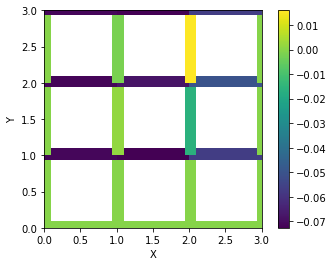

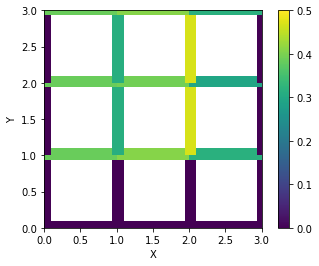

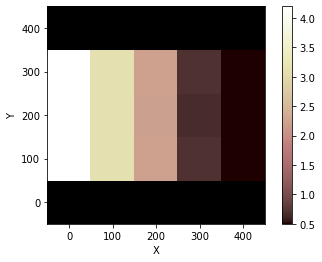

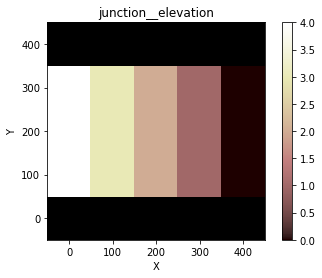

In [51]:
figure()
plot_links(mg, 'conduit__discharge')
figure()
plot_links(mg, 'hydraulic__diameter')
figure()
imshow_grid_at_node(mg, h)
figure()
imshow_grid_at_node(mg, 'junction__elevation')


In [9]:
FUDGE=0.0001
active_links = mg.active_links
head_nodes = mg.node_at_link_head[active_links]
tail_nodes = mg.node_at_link_tail[active_links]
h_head = mg.at_node['hydraulic__head'][head_nodes]
h_tail = mg.at_node['hydraulic__head'][tail_nodes]
#Calculate flow depths using offset and junction elevations
y_head = h_head - mg.at_node['junction__elevation'][head_nodes] \
         - mg.at_link['conduit_head__offset'][active_links]
y_tail = h_tail - mg.at_node['junction__elevation'][tail_nodes] \
          - mg.at_link['conduit_tail__offset'][active_links]
y_head[y_head>mg.at_link['maximum__depth'][active_links]] = mg.at_link['maximum__depth'][active_links][y_head>mg.at_link['maximum__depth'][active_links]]
y_tail[y_tail>mg.at_link['maximum__depth'][active_links]] = mg.at_link['maximum__depth'][active_links][y_tail>mg.at_link['maximum__depth'][active_links]]
y_avg = 0.5*(y_head + y_tail)
A_avg = mg.at_link['width'][active_links] * y_avg
y_avg[y_avg<FUDGE] = FUDGE
A_avg[A_avg<FUDGE] = FUDGE

In [10]:
h_head>h_tail

array([False, False, False, False, False, False, False, False, False], dtype=bool)

In [22]:
#y_tail[y_tail>mg.at_link['maximum__depth'][active_links]] = 
#mg.at_link['maximum__depth'][active_links][y_tail>mg.at_link['maximum__depth'][active_links]]
d_h_square(mg.at_link['width'][active_links], y_avg)

array([  3.96936126e-01,   3.53636005e-04,   3.99594057e-04,
         3.99687423e-04,   3.99814040e-04,   3.99715864e-04,
         3.99694894e-04,   4.90132384e-01,   3.99793756e-04,
         3.96927434e-04,   3.99777355e-04,   3.99802869e-04,
         3.99787176e-04,   3.97200621e-04,   2.81319838e-01,
         3.99646193e-04,   3.99446218e-04,   3.99054260e-04])

In [21]:
def d_h_square(width, flow_depth):
    d_H = np.zeros(np.size(width))
    is_full_pipe = np.isclose(width,flow_depth)
    d_H[is_full_pipe] = width[is_full_pipe]
    d_H[~is_full_pipe] = 4.*width[~is_full_pipe]*flow_depth[~is_full_pipe] / (2.*flow_depth[~is_full_pipe] + width[~is_full_pipe])
    return d_H

In [17]:
mg.at_link['hydraulic__diameter'][mg.active_links]

array([ 0.75,  0.75,  0.75,  0.5 ,  0.75,  0.75,  0.75,  0.75,  0.75,
        0.75,  0.5 ,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.5 ])

In [11]:
pfn.run_one_step()

Number of iterations = 1 tolerance = nan  iteration time= 0.016219377517700195


/home/mcoving/Data/github/landlab/landlab/components/conduit_networks/pressurized_flow.py:186: RuntimeWarning: divide by zero encountered in true_divide
  self.r = 8*f*L/(g*r_s**2.*d_h**5.)
/home/mcoving/Data/github/landlab/landlab/components/conduit_networks/pressurized_flow.py:267: RuntimeWarning: divide by zero encountered in double_scalars
  ADA_ij[i][j] = -1./(a[this_link]*r[this_link]*np.fabs(self.Q[this_link])**(a[this_link]-1))
/home/mcoving/anaconda3/envs/landlab_dev/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:198: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
/home/mcoving/Data/github/landlab/landlab/components/conduit_networks/pressurized_flow.py:277: RuntimeWarning: divide by zero encountered in true_divide
  dQ= -(1./a[self.grid.active_links])*self.Q[self.grid.active_links] - 1./(a[self.grid.active_links]*r[self.grid.active_links]*np.fabs(self.Q[self.grid.active_links])**(a[self.grid.active_link

In [5]:
d_h.copy()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [54]:
mg.at_node['junction__elevation']

array([ 4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,
        1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.])